<a href="https://colab.research.google.com/github/prapti814/ML/blob/main/cat_dog_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 69% 151M/218M [00:00<00:00, 1.57GB/s]
100% 218M/218M [00:00<00:00, 999MB/s] 


In [14]:
import tensorflow as tf


train_dir = '/content/cat-and-dog/training_set/training_set'
test_dir = '/content/cat-and-dog/test_set/test_set'

# Set image dimensions and batch size
img_height = 128
img_width = 128
batch_size = 32

# Load the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Load the testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

print("Training dataset loaded successfully.")
print("Testing dataset loaded successfully.")

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.
Training dataset loaded successfully.
Testing dataset loaded successfully.


In [13]:
# Unzip the downloaded dataset
!unzip -q /content/cat-and-dog.zip -d /content/cat-and-dog

In [15]:

print(train_ds.class_names) # cat=0 dog=1

['cats', 'dogs']


In [16]:
def process_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [17]:
train_ds= train_ds.map(process_images)
test_ds= test_ds.map(process_images)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
from tensorflow.keras.layers import BatchNormalization

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3),padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))


model.add(Conv2D(64,(3,3),activation='relu',padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,(3,3),activation='relu',padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(68,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step - accuracy: 0.5777 - loss: 1.2924 - val_accuracy: 0.4993 - val_loss: 1.3890
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.6349 - loss: 0.6448 - val_accuracy: 0.5482 - val_loss: 0.6968
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.6938 - loss: 0.5653 - val_accuracy: 0.7306 - val_loss: 0.5368
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.7453 - loss: 0.4976 - val_accuracy: 0.7039 - val_loss: 0.5864
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.7743 - loss: 0.4609 - val_accuracy: 0.7499 - val_loss: 0.5375
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7975 - loss: 0.4016 - val_accuracy: 0.7726 - val_loss: 0.5718
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8262 - loss: 0.3726 - val_accuracy: 0.7375 - val_loss: 0.5844
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8701 - loss: 0.2842 - 

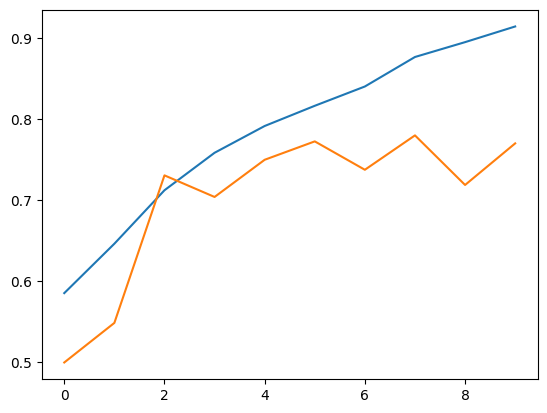

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

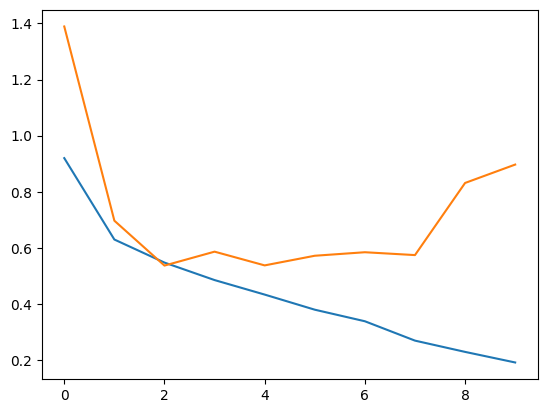

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [28]:
import cv2
test_img=cv2.imread('/content/cat1.jpg')
test_img=cv2.resize(test_img,(128,128))

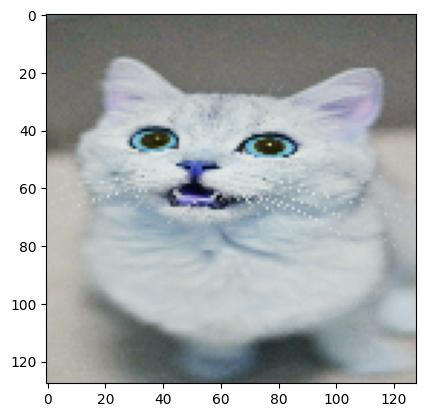

In [29]:
plt.imshow(test_img)

In [30]:
test_input=test_img.reshape((1,128,128,3))
pred =model.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
Cat


In [31]:
dog=cv2.imread('/content/dog.jpg')
dog=cv2.resize(dog,(128,128))

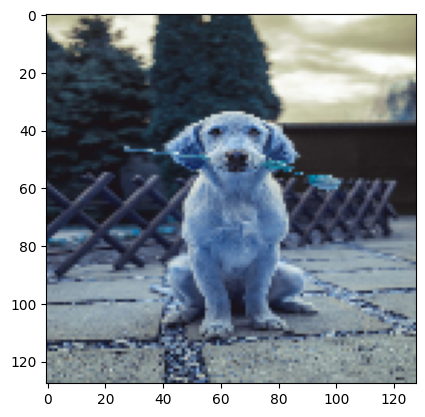

In [32]:
plt.imshow(dog)

In [33]:
input=dog.reshape((1,128,128,3))
pred =model.predict(input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Dog


#model on data augumentation

In [35]:
#data augumentation
import tensorflow as tf

batch_size = 32
train_dir = '/content/cat-and-dog/training_set/training_set'
test_dir = '/content/cat-and-dog/test_set/test_set'

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
 rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True
)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_gen=train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=batch_size,
    class_mode='binary'
)
test_gen=test_datagen.flow_from_directory(
     '/content/cat-and-dog/test_set/test_set',
     target_size=(128,128),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [36]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3),padding="valid"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))


model1.add(Conv2D(64,(3,3),activation='relu',padding="valid"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model1.add(Conv2D(128,(3,3),activation='relu',padding="valid"))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(68,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history1=model1.fit(train_gen,epochs=10,validation_data=test_gen)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 55s 195ms/step - accuracy: 0.5637 - loss: 1.3318 - val_accuracy: 0.5180 - val_loss: 0.7935
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - accuracy: 0.6323 - loss: 0.6857 - val_accuracy: 0.6065 - val_loss: 0.6627
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.6691 - loss: 0.6144 - val_accuracy: 0.6886 - val_loss: 0.5920
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.7051 - loss: 0.5650 - val_accuracy: 0.7049 - val_loss: 0.5703
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 45s 178ms/step - accuracy: 0.7354 - loss: 0.5098 - val_accuracy: 0.7187 - val_loss: 0.5740
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.7794 - loss: 0.4608 - val_accuracy: 0.7489 - val_loss: 0.5684
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.7931 - loss: 0.4452 - val_accuracy: 0.7395 - val_loss: 0.5155
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 84s 177ms/step - accuracy: 0.8001 - loss: 0

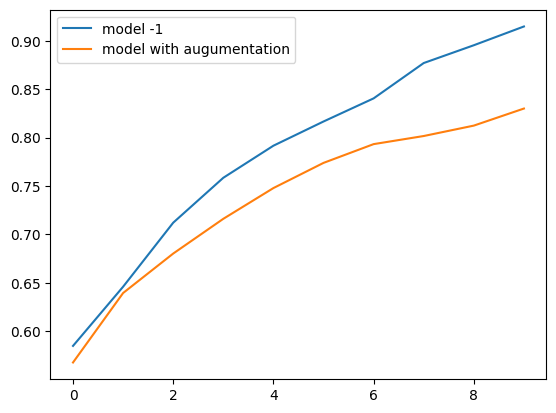

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.legend(['model -1','model with augumentation'])

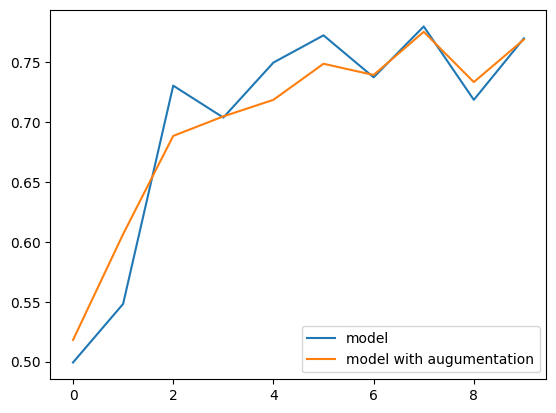

In [44]:
plt.plot(history.history['val_accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['model','model with augumentation'])

In [57]:
test_img2=cv2.imread('/content/funny_dog.jpg')
test_img2=cv2.resize(test_img2,(128,128))

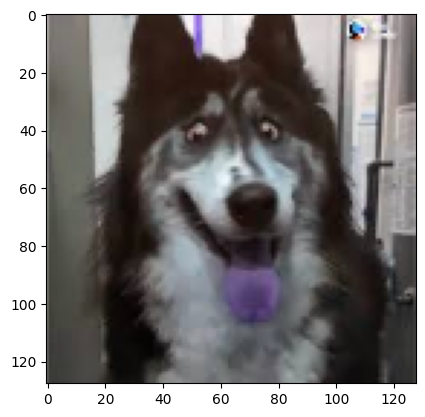

In [58]:
plt.imshow(test_img2)

In [59]:
# model without augumentation
test_input=test_img2.reshape((1,128,128,3))
pred =model.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dog


In [60]:
# model with augumentation
#test_input=test_img.reshape((1,128,128,3))
pred =model1.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Dog


In [61]:
test_img2=cv2.imread('/content/funny_cat.jpg')
test_img2=cv2.resize(test_img2,(128,128))

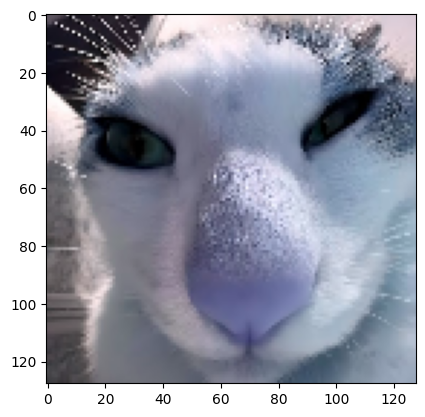

In [62]:
plt.imshow(test_img2)

In [63]:
# model without augumentation
test_input=test_img2.reshape((1,128,128,3))
pred =model.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Dog


In [64]:
# model with augumentation
#test_input=test_img.reshape((1,128,128,3))
pred =model1.predict(test_input)
if pred[0][0] > 0.5:
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Cat
